In [ ]:
import os,shutil

In [ ]:
os.environ['KAGGLE_USERNAME']='rohanazad'
os.environ['KAGGLE_KEY']='39dee8b8f5accea3c612d11069614737'

In [ ]:
!kaggle competitions download -c ashrae-energy-prediction

 90% 150M/167M [00:00<00:00, 203MB/s]
100% 167M/167M [00:00<00:00, 214MB/s]
 92% 81.0M/88.4M [00:00<00:00, 266MB/s]
100% 88.4M/88.4M [00:00<00:00, 254MB/s]
  0% 0.00/2.53M [00:00<?, ?B/s]
100% 2.53M/2.53M [00:00<00:00, 170MB/s]
 99% 118M/120M [00:00<00:00, 123MB/s] 
100% 120M/120M [00:00<00:00, 154MB/s]
  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 178MB/s]
  0% 0.00/44.5k [00:00<?, ?B/s]
100% 44.5k/44.5k [00:00<00:00, 39.0MB/s]


In [ ]:
import pandas as pd

In [ ]:
import zipfile

unzipped_train=zipfile.ZipFile('train.csv.zip')
unzipped_train.extractall()
unzipped_train.close()

unzipped_test=zipfile.ZipFile('test.csv.zip')
unzipped_test.extractall()
unzipped_test.close()

In [ ]:
unzipped_weather_train=zipfile.ZipFile('weather_train.csv.zip')
unzipped_weather_train.extractall()
unzipped_weather_train.close()

unzipped_weather_test=zipfile.ZipFile('weather_test.csv.zip')
unzipped_weather_test.extractall()
unzipped_weather_test.close()

In [ ]:
weather_train=pd.read_csv('weather_train.csv')
weather_test=pd.read_csv('weather_test.csv')
building_met=pd.read_csv('building_metadata.csv')

In [ ]:
# total=weather_train.isnull().sum().sort_values(ascending=False)
# percent=(weather_train.isnull().sum()/weather_train.isnull().count()).sort_values(ascending=False)
# missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
# missing_values.head(20)

In [ ]:
# total=building_met.isnull().sum().sort_values(ascending=False)
# percent=(building_met.isnull().sum()/building_met.isnull().count()).sort_values(ascending=False)
# missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
# missing_values.head(20)

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
weather_train=pd.read_csv('weather_train.csv')
weather_test=pd.read_csv('weather_test.csv')
building_met=pd.read_csv('building_metadata.csv')

In [ ]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(20)

,total,percent
meter_reading,0,0.0
timestamp,0,0.0
meter,0,0.0
building_id,0,0.0


In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:
print('shape of train:',train.shape)
print('shape of test:',test.shape)
print('shape of weather_train:',weather_train.shape)
print('shape of weather_test:',weather_test.shape)
print('shape of building_metadata:',building_met.shape)

shape of train: (20216100, 4)
shape of test: (41697600, 4)
shape of weather_train: (139773, 9)
shape of weather_test: (277243, 9)
shape of building_metadata: (1449, 6)


In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

**timestamp stores data as strings in a particular format. Year,month,day,time**

**Apply to_datetime to convert string to object**

In [ ]:
train['timestamp']=pd.to_datetime(train['timestamp'])
test['timestamp']=pd.to_datetime(test['timestamp'])
weather_train['timestamp']=pd.to_datetime(weather_train['timestamp'])
weather_test['timestamp']=pd.to_datetime(weather_test['timestamp'])

building_met['primary_use']=building_met['primary_use'].astype('category')

**Merging the three dataset to create train set**

In [ ]:
temp=train[['building_id']]
temp=temp.merge(building_met,on='building_id',how='left')
del temp['building_id']
train=pd.concat([train,temp],axis=1)



In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN


In [ ]:
temp=train[['site_id','timestamp']]
temp=temp.merge(weather_train,on=['site_id','timestamp'],how='left')
del temp['site_id'],temp['timestamp']
train=pd.concat([train,temp],axis=1)

del temp,weather_train

In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [ ]:
train.shape

(20216100, 16)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int64         
 1   meter               int64         
 2   timestamp           datetime64[ns]
 3   meter_reading       float64       
 4   site_id             int64         
 5   primary_use         category      
 6   square_feet         int64         
 7   year_built          float64       
 8   floor_count         float64       
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
dtypes: category(1), datetime64[ns](1), float64(10), int64(4)
memory usage: 2.3 GB


In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


**Looking for missing values**

In [ ]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(20)

,total,percent
floor_count,16709167,0.826528
year_built,12127645,0.599900
cloud_coverage,8825365,0.436551
precip_depth_1_hr,3749023,0.185447
wind_direction,1449048,0.071678
sea_level_pressure,1231669,0.060925
wind_speed,143676,0.007107
dew_temperature,100140,0.004953
air_temperature,96658,0.004781
square_feet,0,0.000000


In [ ]:
# train=train.dropna()

In [ ]:
train.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8.088455e+06,3.506933e+06,2.011944e+07,1.139074e+07,2.011596e+07,1.646708e+07,1.898443e+07,1.876705e+07,2.007242e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03,7.992232e+00,1.077830e+05,1.968277e+03,4.184848e+00,1.598795e+01,1.900423e+00,7.747429e+00,7.964155e-01,1.016085e+03,1.730151e+02,3.377525e+00
std,4.269133e+02,9.309921e-01,1.532356e+05,5.099060e+00,1.171424e+05,3.020815e+01,4.008277e+00,1.094729e+01,2.402909e+00,1.017867e+01,7.468997e+00,7.060539e+00,1.140574e+02,2.265694e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,1.951000e+03,1.000000e+00,8.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011600e+03,7.000000e+01,2.100000e+00
50%,8.950000e+02,0.000000e+00,7.877500e+01,9.000000e+00,7.270900e+04,1.969000e+03,3.000000e+00,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00
75%,1.179000e+03,1.000000e+00,2.679840e+02,1.300000e+01,1.391130e+05,1.993000e+03,6.000000e+00,2.410000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020500e+03,2.800000e+02,4.600000e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01


In [ ]:
# total=train.isnull().sum().sort_values(ascending=False)
# percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
# missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
# missing_values.head(20)

In [ ]:
test.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01
1,1,1,0,2017-01-01
2,2,2,0,2017-01-01
3,3,3,0,2017-01-01
4,4,4,0,2017-01-01


In [ ]:
test.shape

(41697600, 4)

In [ ]:
import pandas as pd

temp=test[['building_id']]
temp=temp.merge(building_met,on='building_id',how='left')
del temp['building_id']
test=pd.concat([test,temp],axis=1)

In [ ]:
test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,0,2017-01-01,0,Education,7432,2008.0,NaN
1,1,1,0,2017-01-01,0,Education,2720,2004.0,NaN
2,2,2,0,2017-01-01,0,Education,5376,1991.0,NaN
3,3,3,0,2017-01-01,0,Education,23685,2002.0,NaN
4,4,4,0,2017-01-01,0,Education,116607,1975.0,NaN


In [ ]:
temp=test[['site_id','timestamp']]
temp=temp.merge(weather_test,on=['site_id','timestamp'],how='left')
del temp['timestamp'],temp['site_id']
test=pd.concat([test,temp],axis=1)

del temp,weather_test

In [ ]:
test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01,0,Education,7432,2008.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,1,1,0,2017-01-01,0,Education,2720,2004.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
2,2,2,0,2017-01-01,0,Education,5376,1991.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
3,3,3,0,2017-01-01,0,Education,23685,2002.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
4,4,4,0,2017-01-01,0,Education,116607,1975.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6


In [ ]:
total=test.isnull().sum().sort_values(ascending=False)
percent=(test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(20)

,total,percent
floor_count,34444320,0.826050
year_built,24598080,0.589916
cloud_coverage,19542180,0.468664
precip_depth_1_hr,7801563,0.187099
wind_direction,2978663,0.071435
sea_level_pressure,2516826,0.060359
wind_speed,302089,0.007245
dew_temperature,260799,0.006255
air_temperature,221901,0.005322
square_feet,0,0.000000


In [ ]:
# test=test.dropna()

In [ ]:
test.describe()

,row_id,building_id,meter,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,1.709952e+07,7.253280e+06,4.147570e+07,2.215542e+07,4.143680e+07,3.389604e+07,3.918077e+07,3.871894e+07,4.139551e+07
mean,2.084880e+07,8.075824e+02,6.642857e-01,8.086134e+00,1.069469e+05,1.968170e+03,4.120773e+00,1.550571e+01,1.973346e+00,7.585971e+00,9.182989e-01,1.016200e+03,1.738408e+02,3.386153e+00
std,1.203706e+07,4.297680e+02,9.278067e-01,5.134712e+00,1.160888e+05,3.029171e+01,3.967246e+00,1.128481e+01,2.460285e+00,1.055836e+01,8.501660e+00,7.544885e+00,1.135151e+02,2.237786e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,-2.810000e+01,0.000000e+00,-3.160000e+01,-1.000000e+00,9.720000e+02,0.000000e+00,0.000000e+00
25%,1.042440e+07,4.047500e+02,0.000000e+00,3.000000e+00,3.224350e+04,1.951000e+03,1.000000e+00,7.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011500e+03,8.000000e+01,2.100000e+00
50%,2.084880e+07,9.000000e+02,0.000000e+00,9.000000e+00,7.226250e+04,1.969000e+03,3.000000e+00,1.670000e+01,2.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00
75%,3.127320e+07,1.194250e+03,1.000000e+00,1.300000e+01,1.383875e+05,1.993000e+03,6.000000e+00,2.390000e+01,4.000000e+00,1.670000e+01,0.000000e+00,1.020600e+03,2.800000e+02,4.600000e+00
max,4.169760e+07,1.448000e+03,3.000000e+00,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,4.830000e+01,9.000000e+00,2.670000e+01,5.970000e+02,1.050100e+03,3.600000e+02,2.420000e+01


In [ ]:
# test_chilled_water= test.loc[(test['meter']==1)]

In [ ]:
# test_chilled_water.shape

In [ ]:
# test_drop_cols=['row_id']

In [ ]:
# testing=test_chilled_water.drop(test_drop_cols,axis=1)

In [ ]:
# testing.shape

In [ ]:
test.shape

(41697600, 16)

In [ ]:
len(train)

20216100

In [ ]:
train.count()

building_id           20216100
meter                 20216100
timestamp             20216100
meter_reading         20216100
site_id               20216100
primary_use           20216100
square_feet           20216100
year_built             8088455
floor_count            3506933
air_temperature       20119442
cloud_coverage        11390735
dew_temperature       20115960
precip_depth_1_hr     16467077
sea_level_pressure    18984431
wind_direction        18767052
wind_speed            20072424
dtype: int64

**Data visualization**

**Visualizing number of data and NaNs available**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

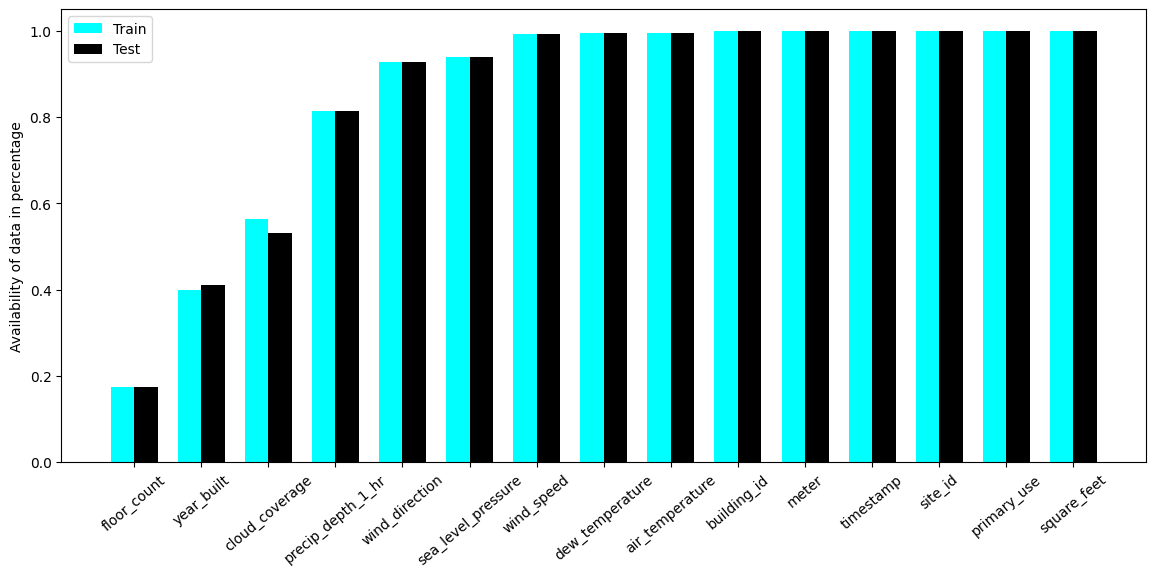

In [ ]:
train_data=(train.count()/len(train)).drop('meter_reading').sort_values().values
ind=np.arange(len(train_data))
width=0.35

fig,axes=plt.subplots(1,1,figsize=(14,6),dpi=100)
tr=axes.bar(ind,train_data,width,color='cyan')

test_data=(test.count()/len(test)).drop('row_id').sort_values().values
tt=axes.bar(ind+width,test_data,width,color='black')

axes.set_ylabel('Availability of data in percentage')
axes.set_xticks(ind+width/2)
axes.set_xticklabels((train.count()/len(train)).drop('meter_reading').sort_values().index,rotation=40)
axes.legend([tr,tt],['Train','Test'])

**Meter reading mean by day and hour**

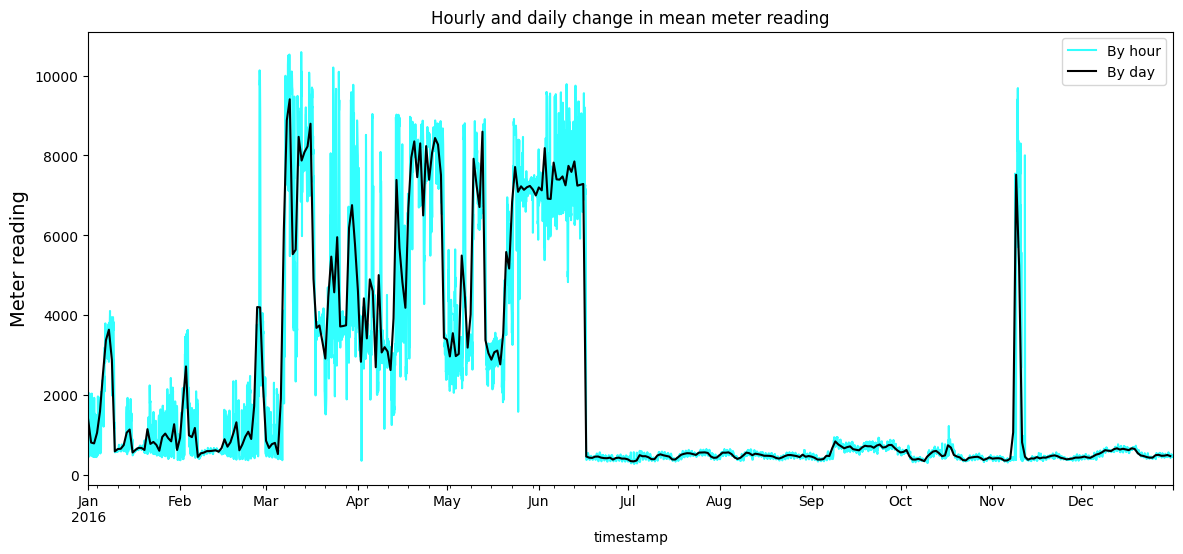

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(14,6),dpi=100)
train[['timestamp','meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes,label='By hour',alpha=0.8,color='cyan').set_ylabel('Meter reading',fontsize=14)
train[['timestamp','meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes,label='By day',alpha=1,color='black').set_ylabel('Meter reading',fontsize=14)

axes.set_title('Hourly and daily change in mean meter reading')
axes.legend()

**Closer investigation of meter readings by specific sites**

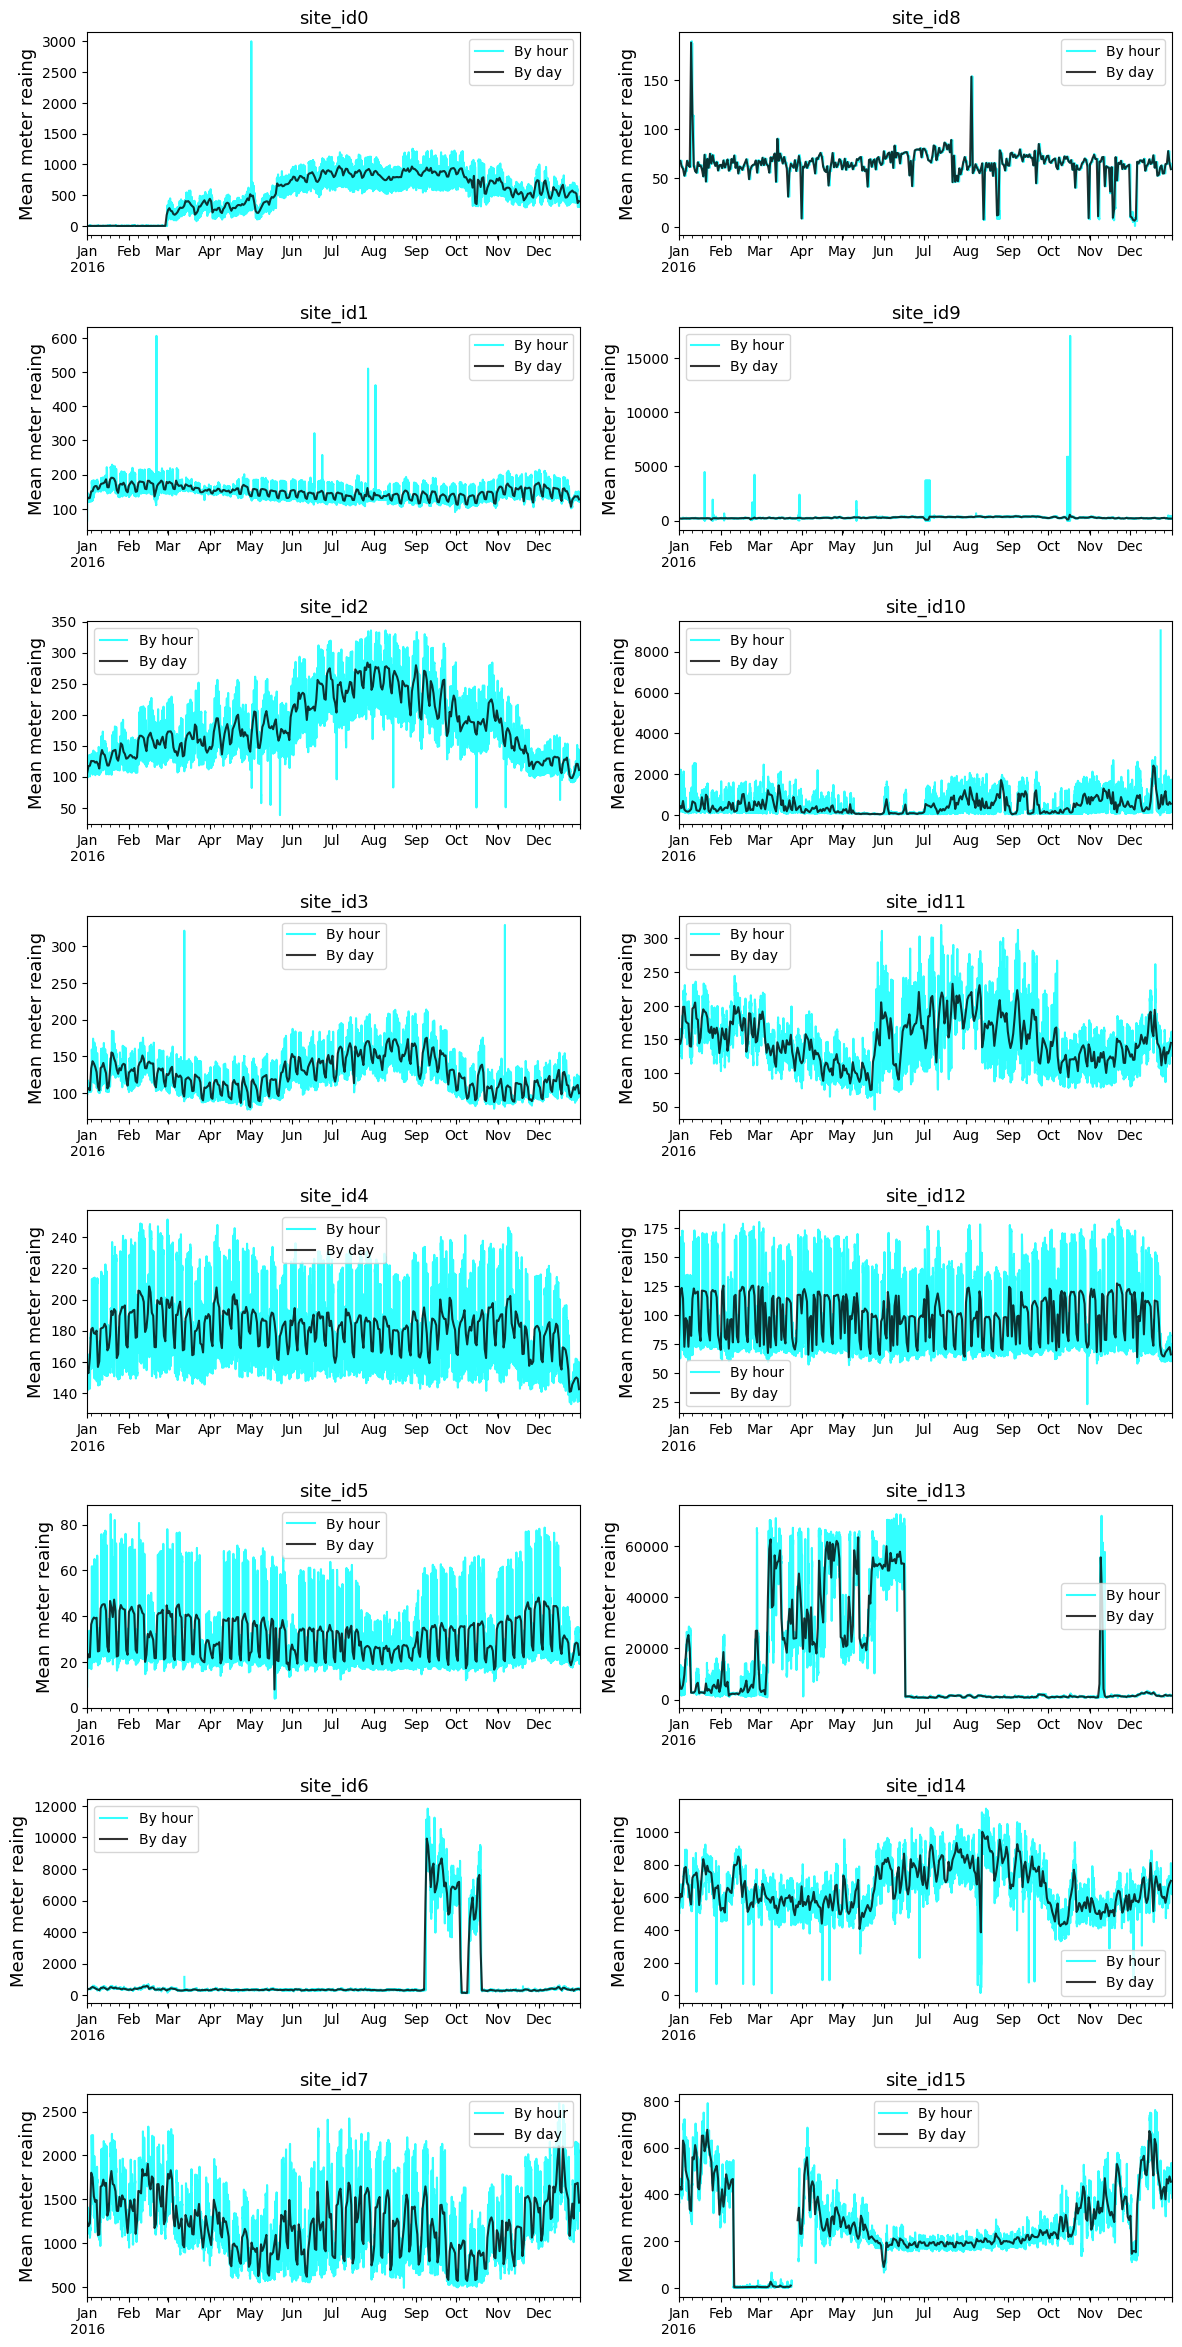

In [ ]:
fig,axes=plt.subplots(8,2,figsize=(14,30),dpi=100)
for i in range(train['site_id'].nunique()):
  train[train['site_id']==i][['timestamp','meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8],alpha=0.8,label='By hour',color='cyan').set_ylabel('Mean meter reaing',fontsize=13)
  train[train['site_id']==i][['timestamp','meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%8][i//8],alpha=0.8,label='By day',color='black').set_xlabel('')
  axes[i%8][i//8].legend()
  axes[i%8][i//8].set_title('site_id{}'.format(i),fontsize=13)
  plt.subplots_adjust(hspace=0.45)


**Further look into site_id 13**

IndexError: ignored

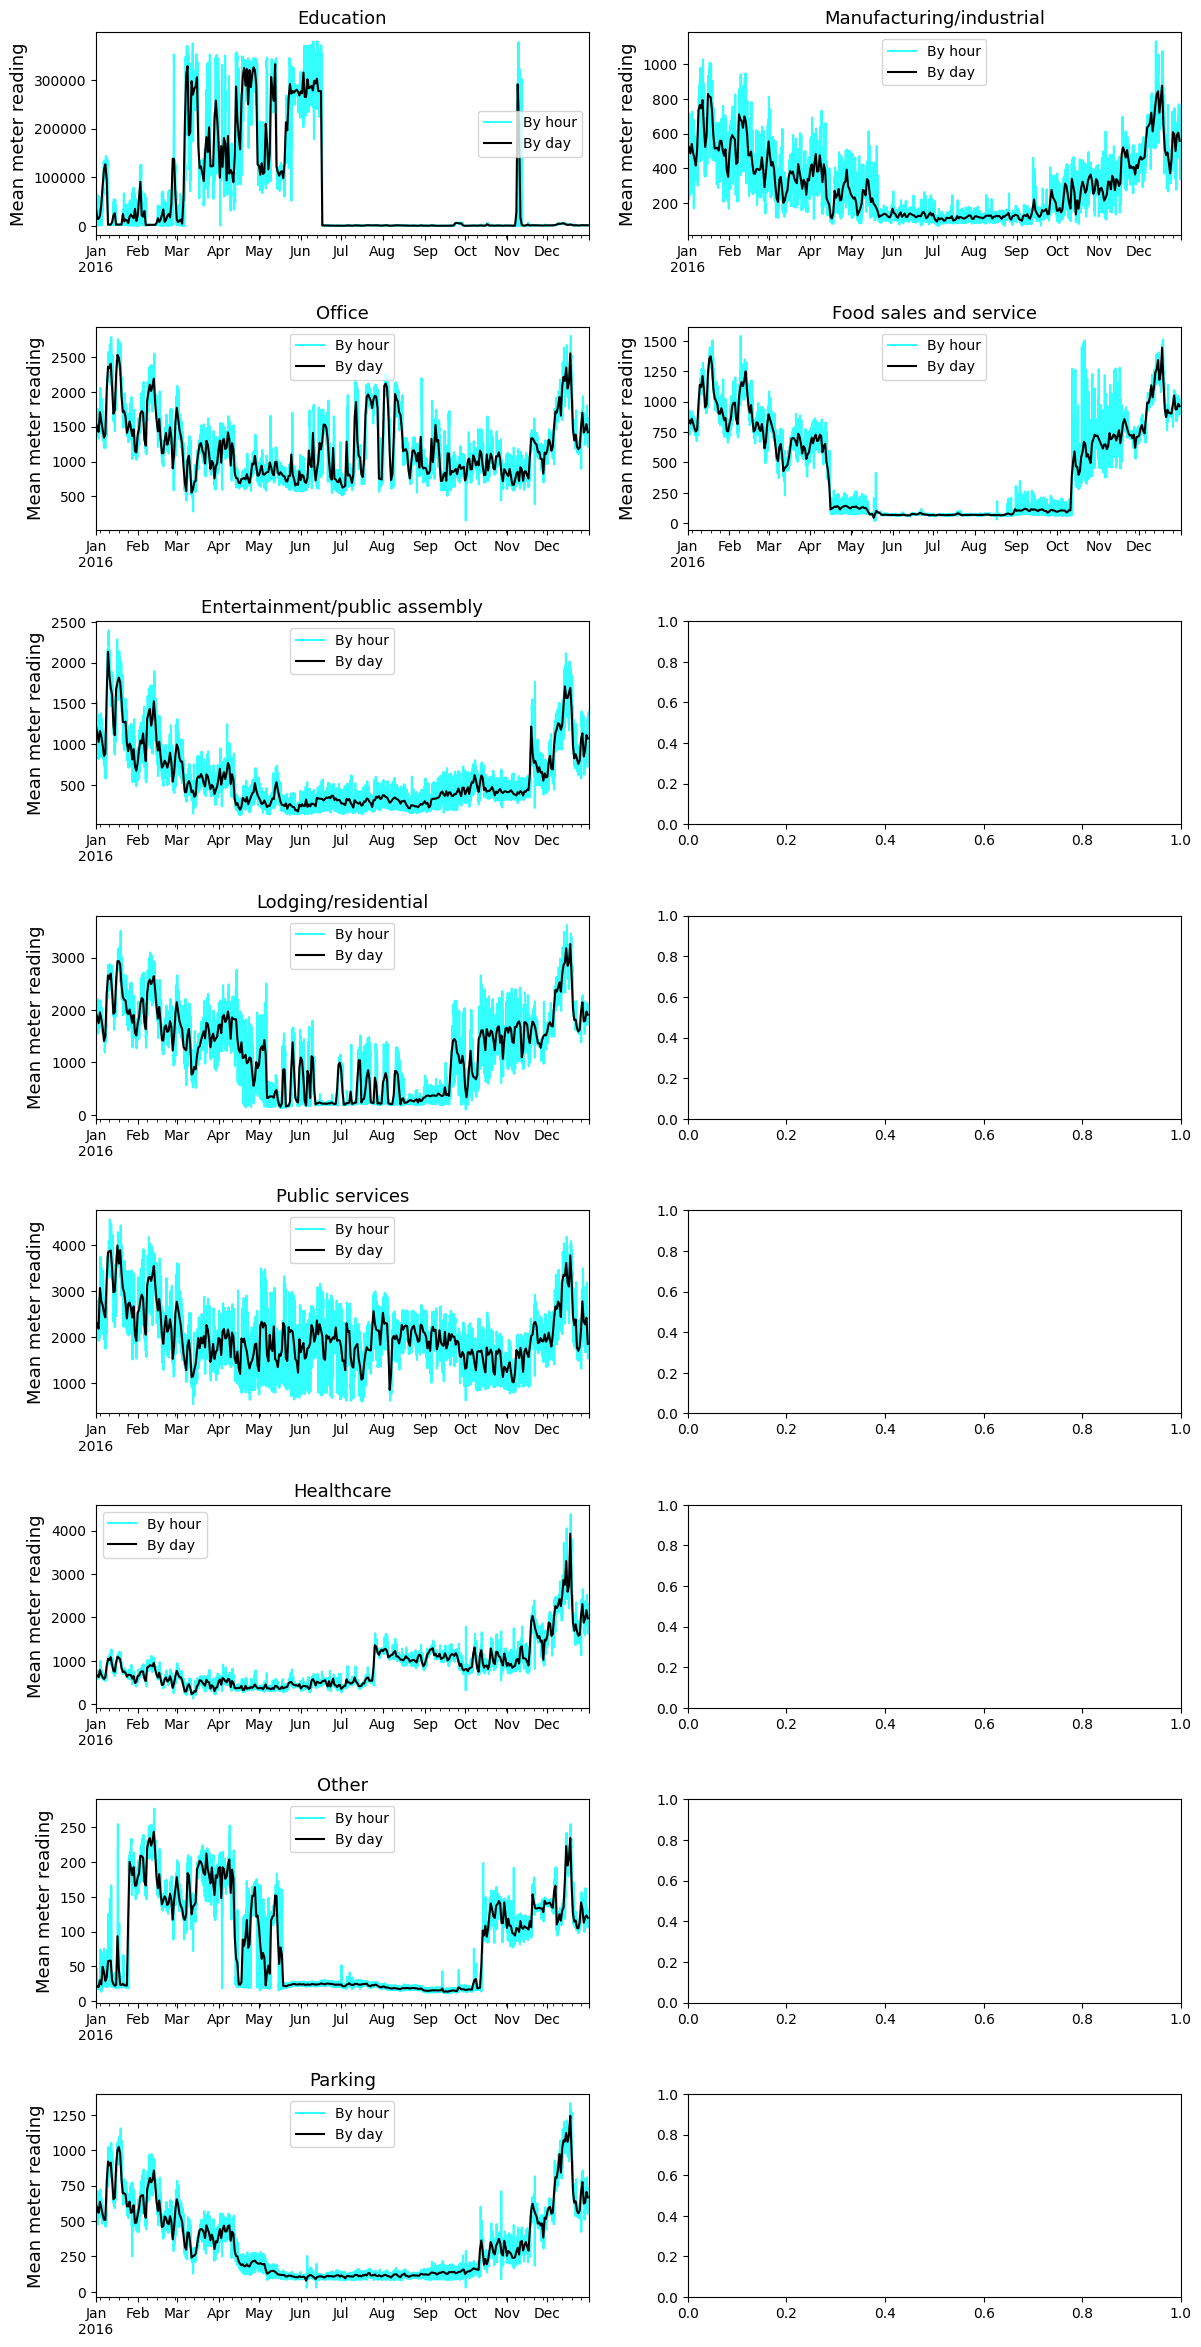

In [ ]:
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i, use in enumerate(train['primary_use'].value_counts().index.to_list()):
    try:
        train[(train['site_id'] == 13) & (train['primary_use'] == use)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='cyan').set_ylabel('Mean meter reading', fontsize=13);
        train[(train['site_id'] == 13) & (train['primary_use'] == use)][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='black').set_xlabel('');
        axes[i%8][i//8].legend();
    except TypeError:
        pass
    axes[i%8][i//8].set_title(use, fontsize=13);
    plt.subplots_adjust(hspace=0.45)

**Different types of meter reading for site id 13 when primary use is education**

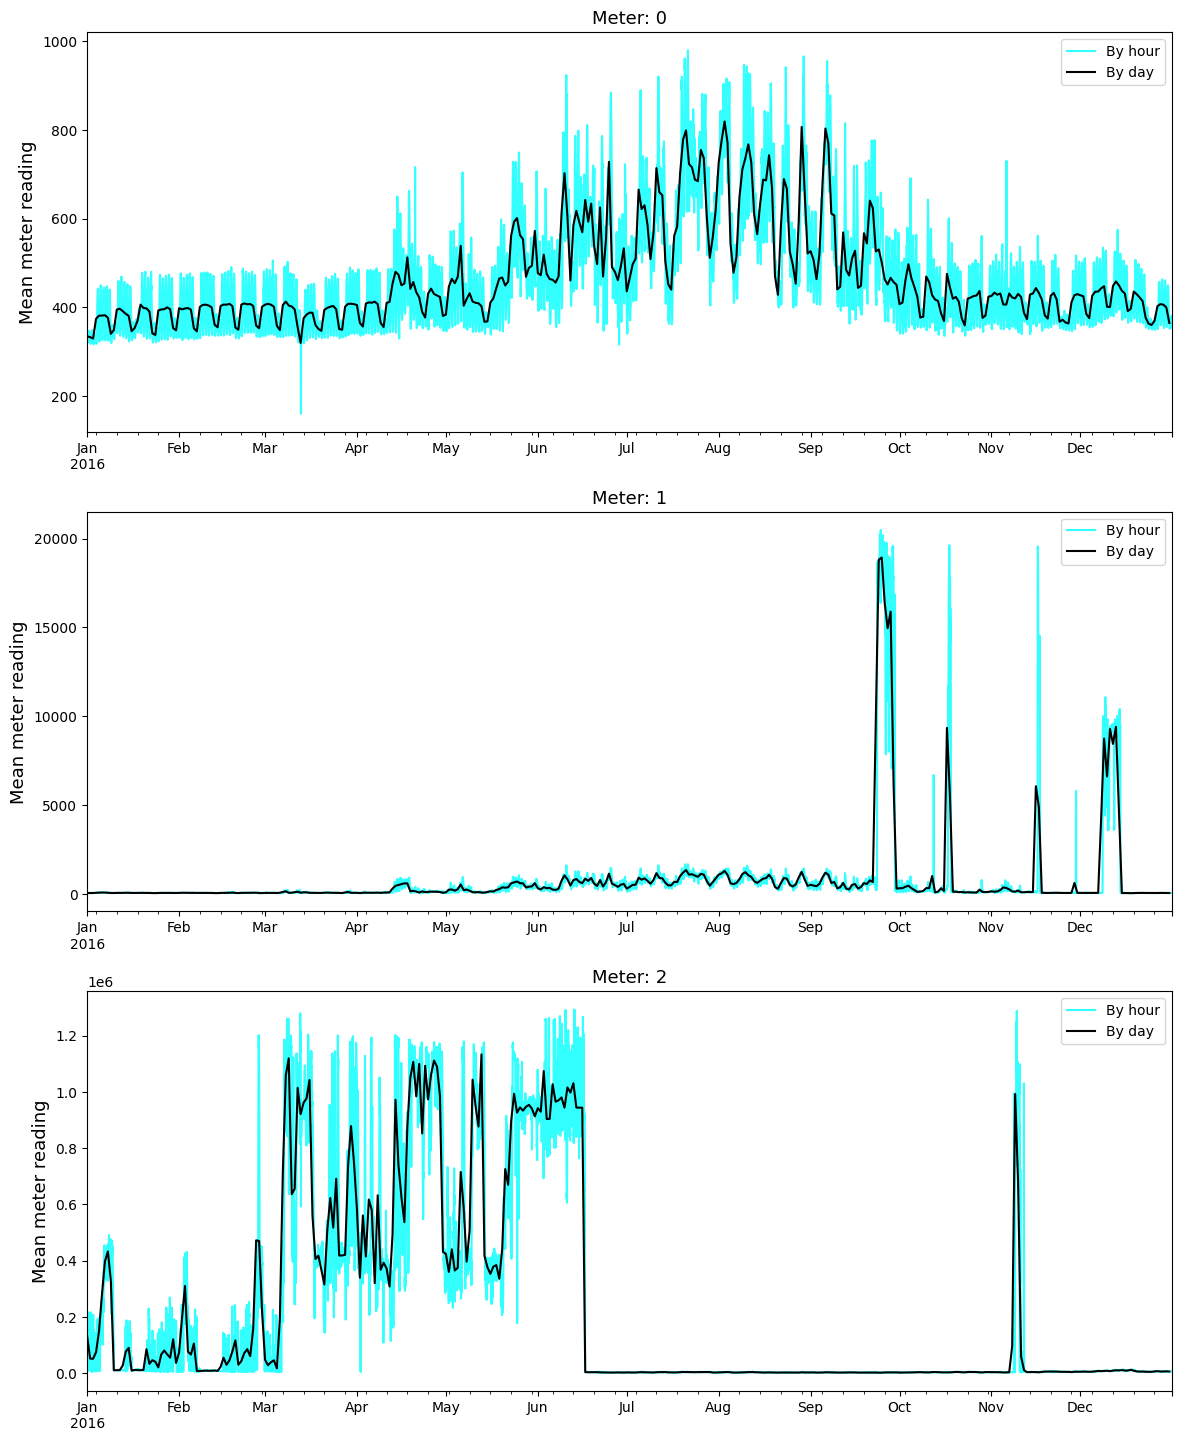

In [ ]:
fig, axes = plt.subplots(3,1,figsize=(14, 18), dpi=100)
for i in train[(train['site_id'] == 13) & (train['primary_use'] == 'Education')]['meter'].value_counts(dropna=False).index.to_list():
    train[(train['site_id'] == 13) & (train['primary_use'] == 'Education') & (train['meter'] == i)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i], alpha=0.8, label='By hour', color='cyan').set_ylabel('Mean meter reading', fontsize=13);
    train[(train['site_id'] == 13) & (train['primary_use'] == 'Education') & (train['meter'] == i)][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i], alpha=1, label='By day', color='black').set_xlabel('');
    axes[i].legend();
    axes[i].set_title('Meter: ' + str(i), fontsize=13);

Fine. What we have right now is that site_id 13 with primary_use Education and meter type 2 is responsible for this mess.

But we need to go deeper. There are 17 buildings that fall under these criteria. No problem. Another plot.

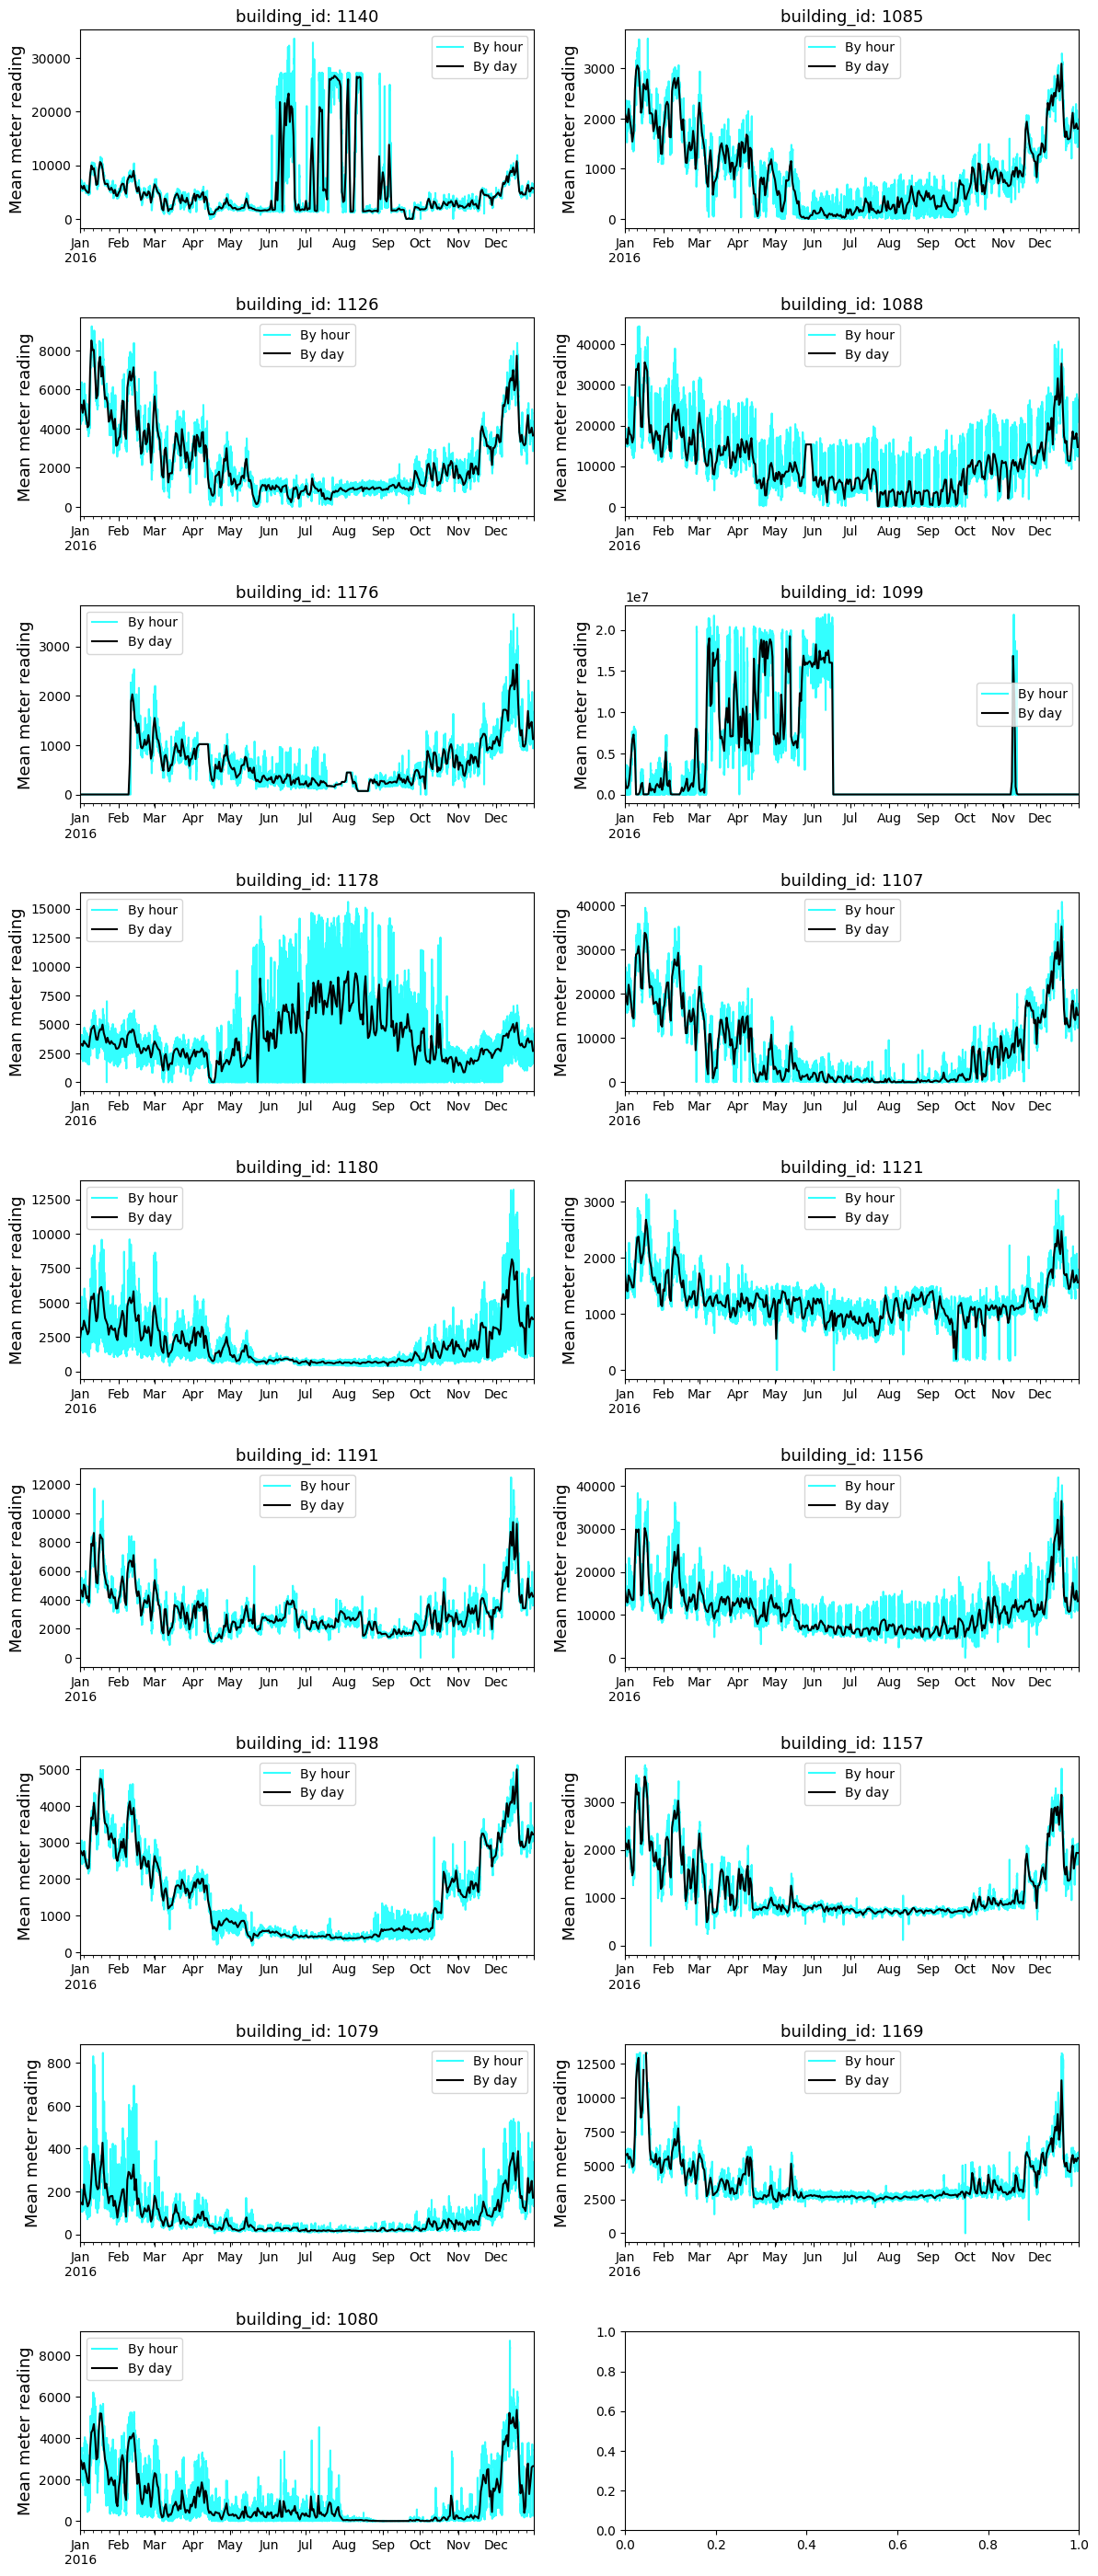

In [ ]:
fig, axes = plt.subplots(9,2,figsize=(14, 36), dpi=100)
for i, building in enumerate(train[(train['site_id'] == 13) & (train['primary_use'] == 'Education') & (train['meter'] == 2)]['building_id'].value_counts(dropna=False).index.to_list()):
    train[(train['site_id'] == 13) & (train['primary_use'] == 'Education') & (train['meter'] == 2) & (train['building_id'] == building)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%9][i//9], alpha=0.8, label='By hour', color='cyan').set_ylabel('Mean meter reading', fontsize=13);
    train[(train['site_id'] == 13) & (train['primary_use'] == 'Education') & (train['meter'] == 2) & (train['building_id'] == building)][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%9][i//9], alpha=1, label='By day', color='black').set_xlabel('');
    axes[i%9][i//9].legend();
    axes[i%9][i//9].set_title('building_id: ' + str(building), fontsize=13);
    plt.subplots_adjust(hspace=0.45)

And we have a winner. It is a building_id == 1099 (we are going to see that guy a little later again). Now lets plot it side by side with a mean meter reading for all dataset. And also see what this plot would look like if we exclude building_id 1099 from the data.

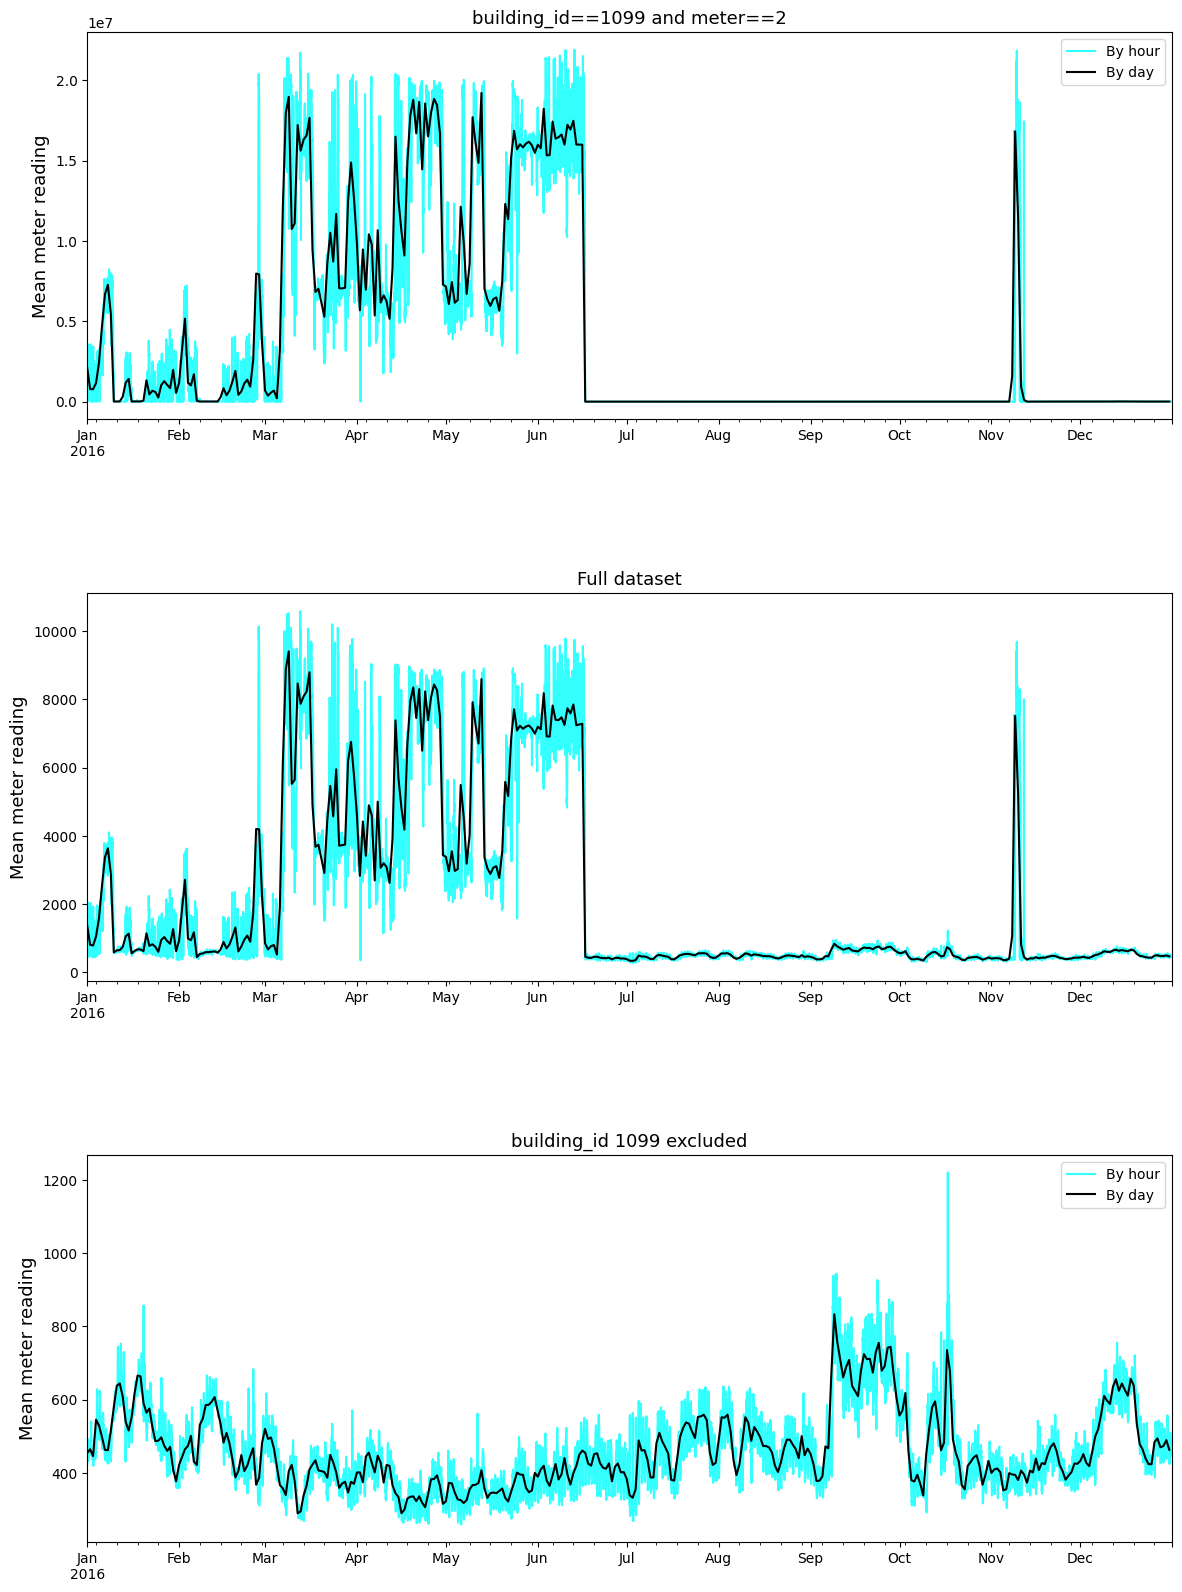

In [ ]:
fig, axes = plt.subplots(3,1,figsize=(14, 20), dpi=100)

train[(train['meter'] == 2) & (train['building_id'] == 1099)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[0], alpha=0.8, label='By hour', color='cyan').set_ylabel('Mean meter reading', fontsize=13);
train[(train['meter'] == 2) & (train['building_id'] == 1099)][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[0], alpha=1, label='By day', color='black').set_xlabel('');

train[['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[1], alpha=0.8, label='By hour', color='cyan').set_ylabel('Mean meter reading', fontsize=13);
train[['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[1], alpha=1, label='By day', color='black').set_xlabel('');

train[~((train['meter'] == 2) & (train['building_id'] == 1099))][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[2], alpha=0.8, label='By hour', color='cyan').set_ylabel('Mean meter reading', fontsize=13);
train[~((train['meter'] == 2) & (train['building_id'] == 1099))][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[2], alpha=1, label='By day', color='black').set_xlabel('');

axes[0].set_title('building_id==1099 and meter==2', fontsize=13);
axes[0].legend()
axes[1].set_title('Full dataset', fontsize=13);
axes[2].set_title('building_id 1099 excluded', fontsize=13);
axes[2].legend()
plt.subplots_adjust(hspace=0.45)

**Number of building counts by meter type ***

In [ ]:
train['building_id'].unique()

array([  0,   1,   2, ..., 591, 783, 403])

In [ ]:
train['building_id'].unique().tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186

In [ ]:
len(train['building_id'].unique().tolist())

1449

In [ ]:
elec_train=train.loc[train['meter']==0]
elec_train_length=len(elec_train['building_id'].unique().tolist())
elec_train_length

1413

In [ ]:
chilled_train=train.loc[train['meter']==1]
chilled_train_length=len(chilled_train['building_id'].unique().tolist())
chilled_train_length

498

In [ ]:
steam_train=train.loc[train['meter']==2]
steam_train_length=len(steam_train['building_id'].unique().tolist())
steam_train_length

324

In [ ]:
hot_train=train.loc[train['meter']==3]
hot_train_length=len(hot_train['building_id'].unique().tolist())
hot_train_length

145

In [ ]:
building_counts=[1413,498,324,145]

No handles with labels found to put in legend.


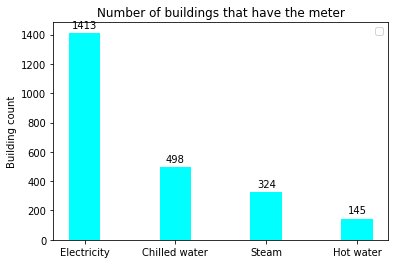

In [ ]:
meter= ['Electricity','Chilled water','Steam','Hot water']
building_counts=[1413,498,324,145]

x=np.arange(len(meter))  #the meter label locations 
width=0.35 # thw width of teh bars

fig,ax=plt.subplots()
rects=ax.bar(x,building_counts,width, color='cyan')

# add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Building count')
ax.set_title('Number of buildings that have the meter')
ax.set_xticks(x)
ax.set_xticklabels(meter)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

plt.show()

In [ ]:
train['meter'].value_counts()

0    12060910
1     4182440
2     2708713
3     1264037
Name: meter, dtype: int64

In [ ]:
train['meter'].value_counts(dropna=False,normalize=True).sort_index()

0    0.596599
1    0.206887
2    0.133988
3    0.062526
Name: meter, dtype: float64

**Meter reading by meter type with occurance normalized and mean meter reading**

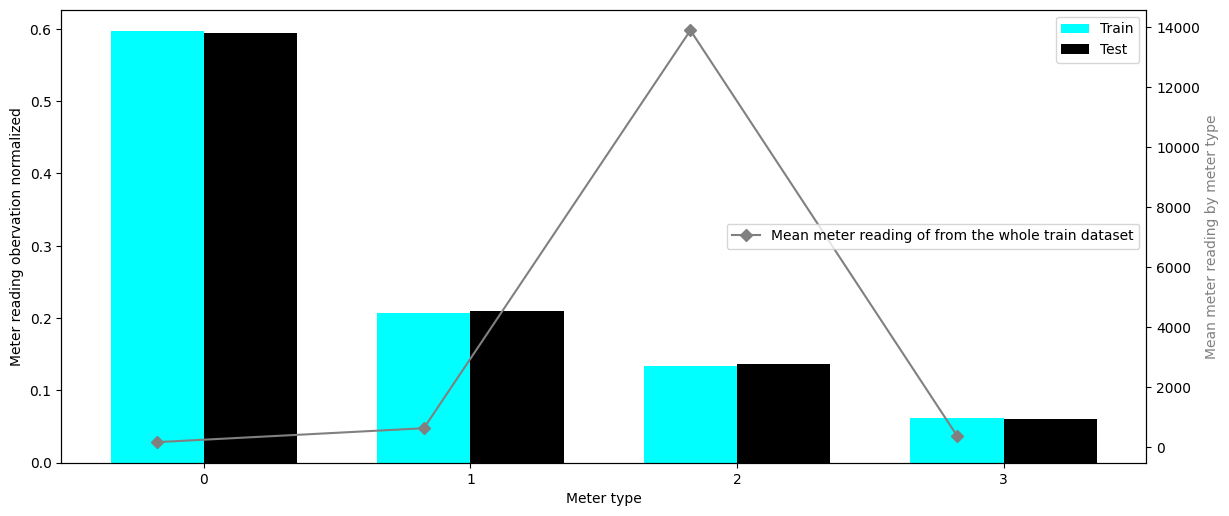

In [ ]:
train_data=train['meter'].value_counts(dropna=False,normalize=True).sort_index().values
ind=np.arange(len(train_data))
width=0.35

fig,axes=plt.subplots(1,1,figsize=(14,6),dpi=100)
tr=axes.bar(ind,train_data,width,color='cyan')

test_data=test['meter'].value_counts(dropna=False,normalize=True).sort_index().values
tt=axes.bar(ind+width,test_data,width,color='black')

axes.set_ylabel('Normalized number of observations')
axes.set_xlabel('meter_type')
axes.set_xticks(ind+width/2)
axes.set_ylabel('Meter reading obervation normalized')
axes.set_xlabel('Meter type')
axes.set_xticks(ind+width/2)
axes.set_xticklabels(train['meter'].value_counts().sort_index().index,rotation=0)
axes2=axes.twinx()

mr = axes2.plot(ind, train[['meter', 'meter_reading']].groupby('meter')['meter_reading'].mean().sort_index().values, 'D-', color='grey', label='Mean meter reading of from the whole train dataset');
axes2.grid(False);
axes2.tick_params(axis='y');
axes2.set_ylabel('Mean meter reading by meter type', color='grey');
axes.legend([tr, tt], ['Train', 'Test'], facecolor='white');
axes2.legend(loc=5, facecolor='white');

**Meter reading by primary use of buildings**

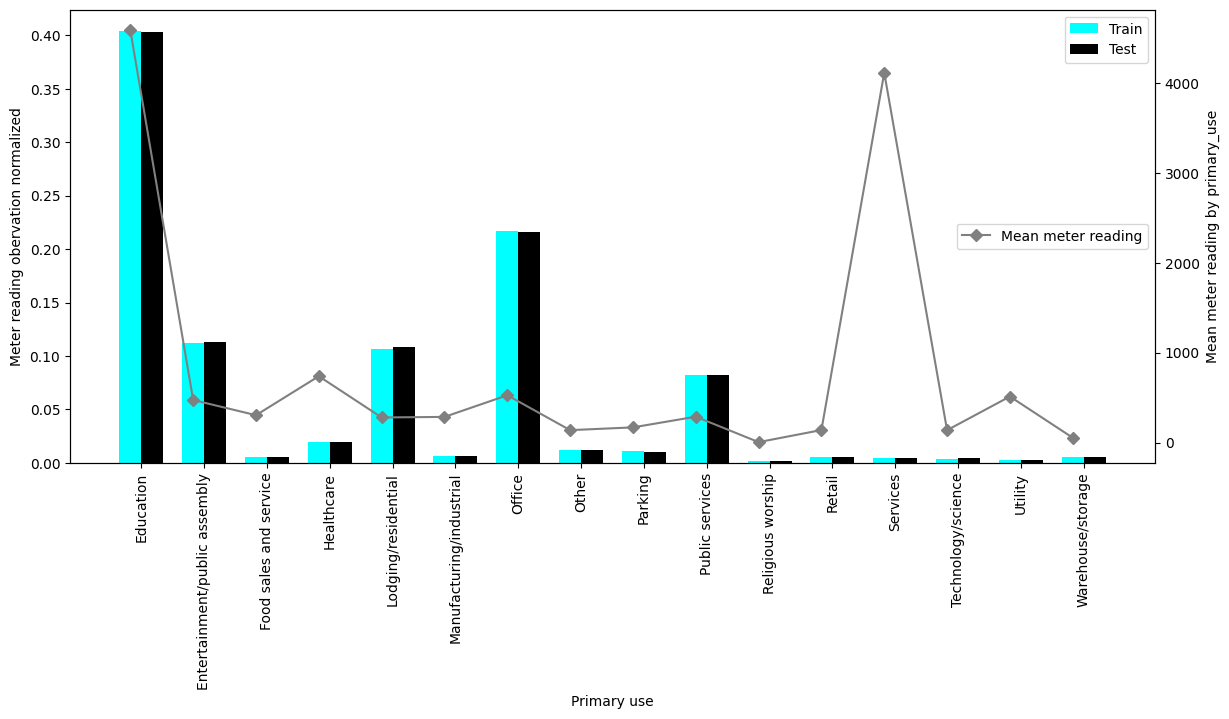

In [ ]:
train_data=train['primary_use'].value_counts(dropna=False,normalize=True).sort_index().values
ind=np.arange(len(train_data))
width=0.35

fig,axes=plt.subplots(1,1,figsize=(14,6),dpi=100)
tr=axes.bar(ind,train_data,width,color='cyan')

test_data=test['primary_use'].value_counts(dropna=False,normalize=True).sort_index().values
tt=axes.bar(ind+width,test_data,width,color='black')

axes.set_ylabel('Normalized number of observations')
axes.set_xlabel('Primary use')
axes.set_xticks(ind+width/2)
axes.set_ylabel('Meter reading obervation normalized')
axes.set_xlabel('Primary use')
axes.set_xticks(ind+width/2)
axes.set_xticklabels(train['primary_use'].value_counts().sort_index().index,rotation=90)
axes2=axes.twinx()

mr = axes2.plot(ind, train[['primary_use', 'meter_reading']].groupby('primary_use')['meter_reading'].mean().sort_index().values, 'D-', color='grey', label='Mean meter reading');
axes2.grid(False);
axes2.tick_params(axis='y');
axes2.set_ylabel('Mean meter reading by primary_use');
axes.legend([tr, tt], ['Train', 'Test'], facecolor='white');
axes2.legend(loc=5, facecolor='white');


**From before, buildinh_id=1099 in site_id=13 with meter 2 had unsual meter readings**

In [ ]:
train[(train['building_id']==1099) & (train['meter_reading']>3000000)]

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
1534,1099,2,2016-01-01 00:00:00,3241630.0,13,Education,332884,NaN,NaN,-8.3,8.0,-12.2,NaN,1023.3,250.0,4.1
3830,1099,2,2016-01-01 01:00:00,3241630.0,13,Education,332884,NaN,NaN,-8.3,NaN,-11.7,-1.0,1023.3,240.0,4.1
22191,1099,2,2016-01-01 09:00:00,3554740.0,13,Education,332884,NaN,NaN,-6.7,NaN,-9.4,-1.0,1022.0,250.0,3.6
24488,1099,2,2016-01-01 10:00:00,3341210.0,13,Education,332884,NaN,NaN,-8.3,NaN,-11.7,0.0,1021.9,270.0,6.7
38275,1099,2,2016-01-01 16:00:00,3009500.0,13,Education,332884,NaN,NaN,-6.7,NaN,-10.6,0.0,1017.9,230.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17345482,1099,2,2016-11-10 15:00:00,15008300.0,13,Education,332884,NaN,NaN,9.4,0.0,2.8,0.0,1013.8,230.0,4.6
17347844,1099,2,2016-11-10 16:00:00,5399540.0,13,Education,332884,NaN,NaN,11.7,0.0,3.3,0.0,1013.5,250.0,4.6
17350207,1099,2,2016-11-10 17:00:00,10357700.0,13,Education,332884,NaN,NaN,13.9,0.0,3.3,0.0,1013.7,270.0,5.1
17352570,1099,2,2016-11-10 18:00:00,12274400.0,13,Education,332884,NaN,NaN,16.1,0.0,4.4,0.0,1013.3,270.0,4.6
